In [2]:
DATA_FOLDER_PATH = "data/Цех обработки материалов"
COLUMNS_TO_DROP = ["Начало среза", "Конец среза", "A-", "R+", "R-"]

In [3]:
import os
import xlrd
import pandas as pd

In [9]:
files_names = os.listdir(DATA_FOLDER_PATH)
info_file_name = files_names[1]
files_names = files_names[3:]
info_file_name, files_names

('cleaned',
 ['Цех обработки материалов, профиль мощности (0).xls',
  'Цех обработки материалов, профиль мощности (1).xls',
  'Цех обработки материалов, профиль мощности (10).xls',
  'Цех обработки материалов, профиль мощности (11).xls',
  'Цех обработки материалов, профиль мощности (12).xls',
  'Цех обработки материалов, профиль мощности (13).xls',
  'Цех обработки материалов, профиль мощности (14).xls',
  'Цех обработки материалов, профиль мощности (15).xls',
  'Цех обработки материалов, профиль мощности (16).xls',
  'Цех обработки материалов, профиль мощности (17).xls',
  'Цех обработки материалов, профиль мощности (18).xls',
  'Цех обработки материалов, профиль мощности (19).xls',
  'Цех обработки материалов, профиль мощности (2).xls',
  'Цех обработки материалов, профиль мощности (20).xls',
  'Цех обработки материалов, профиль мощности (21).xls',
  'Цех обработки материалов, профиль мощности (22).xls',
  'Цех обработки материалов, профиль мощности (23).xls',
  'Цех обработки матер

In [10]:
months_data = {}
for file_name in files_names:
    file_path = DATA_FOLDER_PATH + "/" + file_name
    
    data = pd.read_excel(file_path, skiprows=8)
    data.rename(columns={"дата": "date", "A+": "Потребление"}, inplace=True)
    data.drop(COLUMNS_TO_DROP, axis=1, inplace=True)
    
    date = data.iloc[0, 0]
    date_key = str(date.month) + "." + str(date.year)
    
    months_data[date_key] = data

In [11]:
months_data["1.2020"].head()

,Дата,Потребление
0,2020-01-01 00:30:00,1.042332
1,2020-01-01 01:00:00,1.042091
2,2020-01-01 01:30:00,1.041676
3,2020-01-01 02:00:00,1.019151
4,2020-01-01 02:30:00,1.003932


<AxesSubplot:title={'center':'12.2019'}>

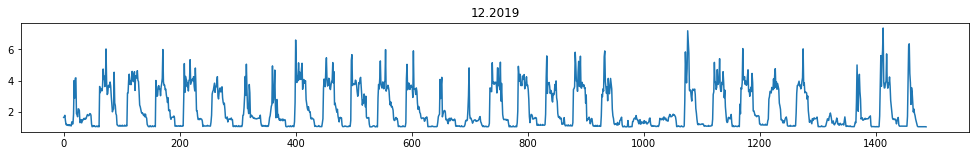

In [12]:
key = "12.2019"
months_data[key]["Потребление"].plot(title=key, figsize=(17, 2))

In [76]:
cleaned_folder = DATA_FOLDER_PATH + "/cleaned"
os.mkdir(cleaned_folder)
for month in months_data:
    month_file_path = cleaned_folder + "/" + month + ".csv"
    months_data[month].to_csv(month_file_path, index=False)